In [1]:
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models.resnet import ResNet50_Weights

In [1]:
import torch
torch.cuda.__version__

AttributeError: module 'torch.cuda' has no attribute '__version__'

In [6]:
resnet50 = models.resnet50(weights='DEFAULT')
list(resnet50.children())[-3]

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(1024, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(512, 2048, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(1024, 2048, kernel_size=(1, 1), stride=(2, 2), bias=False)
      (1): BatchNorm2d(2048, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): 

In [25]:
vgg19 = models.vgg19(weights="DEFAULT")
list(vgg19.children())[:-2]

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (17): ReLU(inplace=T

In [19]:

list(vgg19.children())

[Sequential(
   (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (1): ReLU(inplace=True)
   (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (3): ReLU(inplace=True)
   (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (6): ReLU(inplace=True)
   (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (8): ReLU(inplace=True)
   (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
   (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (11): ReLU(inplace=True)
   (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (13): ReLU(inplace=True)
   (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (15): ReLU(inplace=True)
   (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
   (17): ReLU(inplace=T

In [41]:
model = models.resnext101_64x4d(weights='DEFAULT')

In [33]:
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import random
import numpy as np

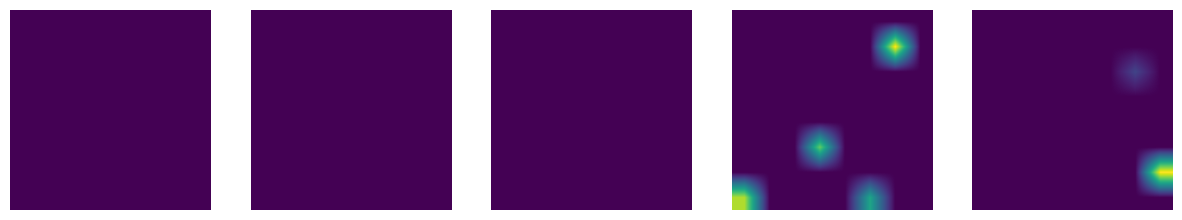

In [45]:
model.eval()
to_tensor=transforms.ToTensor()
input_image = Image.open("epoch003_real_B.png")
image_tensor=to_tensor(input_image)
input_batch = image_tensor.unsqueeze(0)
with torch.no_grad():
    features = nn.Sequential(*list(model.children())[:-2])(input_batch)
    
num_channels = features.size(1)

# Define the desired resolution
desired_resolution = (512, 512)  # Example resolution, adjust as needed

# Number of random feature maps to plot
num_plots = 5  # Change as needed

# Plot random feature maps
plt.figure(figsize=(15, 10))
for i in range(num_plots):
    # Select a random channel index
    random_channel_idx = random.randint(0, num_channels - 1)

    # Get the corresponding feature map
    feature_map = features[0, random_channel_idx, :, :].cpu().numpy()

    # Add batch dimension to the feature map
    feature_map_batch = feature_map[np.newaxis, np.newaxis, :, :]  # Add batch and channel dimensions

    # Resize the feature map to the desired resolution
    resize_transform = transforms.Resize(desired_resolution)
    resized_feature_map = resize_transform(torch.from_numpy(feature_map_batch))

    # Remove the extra batch dimension
    resized_feature_map = resized_feature_map.squeeze().numpy()

    # Plot the resized feature map
    plt.subplot(1, num_plots, i + 1)
    plt.imshow(resized_feature_map, cmap='viridis')  # Use a colormap of your choice
    plt.axis('off')

plt.show()